<a href="https://colab.research.google.com/github/JiayuShen0912/Computer-Vision-Project/blob/JiayuShen%26JackyLam/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Final Project <b> </h1></center>

Our final project will extend the **“Smart Waste Classifier and Management Model”** developed in our previous computer vision project. The primary problem we are addressing is the inefficient segregation and management of waste, which is a significant environmental issue. This problem is crucial because improper waste management leads to increased pollution, reduced recycling rates, and the inefficient use of landfill sites. The model we intend to enhance and deploy in real-life aims to automate the classification of waste into categories like **organic**, **recyclable**, and **hazardous**, facilitating more effective waste management solutions. It could be used in smart bins and waste collection centers to streamline the sorting process, making recycling more efficient and reducing environmental pollution.


Our final project will continue using and fine-tuning the **YOLO model** developed in the previous computer vision project. This model, which is capable of classifying waste into predefined categories, will be further refined to improve accuracy and reduce biases.

Our project is primarily a classification problem, where the task is to classify waste into predefined categories such as organic, recyclable, and hazardous. It is a supervised learning task since it requires labeled data for training the model to recognize and categorize waste accurately.

In [5]:
#First, link to our google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Description

In order to achieve the goal of **improving the accuracy of the original model and reducing bias**, we plan to expand our dataset with more diverse images across the three categories of waste that we focus on. Building on the original dataset (only 60 images), we have taken more images from the public domains to ensure a wider representation of waste types.

 Organic and Recyclable Waste Images available on Mendeley Data => https://data.mendeley.com/datasets/n3gtgm9jxj/2

 Hazardous Waste Images available on kaggle => https://www.kaggle.com/datasets/copycattttt/hazardous-waste

- 2100 images in train folder. 1050 images in val folder.

- 3 different waste:

    - hazardous waste

    - organic waste

    - recyclable waste

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [6]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [7]:
%cd "/content/drive/MyDrive/Colab Notebooks"
!ls

/content/drive/MyDrive/Colab Notebooks
'311c4f644d9850f43eec60b52af0e49b (1).ipynb'
 311c4f644d9850f43eec60b52af0e49b.ipynb
 about-organic-waste.jpg
'Copy of Introduction_to_Python (1).ipynb'
'Copy of Introduction_to_Python (2).ipynb'
'Copy of Introduction_to_Python.ipynb'
'Copy of Week_2_Data_Preprocessing (1).ipynb'
'Copy of Week_2_Data_Preprocessing.ipynb'
'File:December_3,_2012_–_Household_Hazardous_Waste_separated_for_proper_disposal_(8268772840).jpg'
 FinalProject.ipynb
 final_waste_dataset
'Food Residuals.png'
 GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg
 household-hazardous-waste.jpg
'Jiayu Shen_Assignment2.ipynb'
'JiayuShen&JackyLam.ipynb'
'Jiayu_Shen_Week 3.ipynb'
'Jiayu Shen_Week4.ipynb'
 runs
'waste dataset'
 waste_dataset_augmentation.ipynb
 yolov8n-cls.pt
 yolov8n.pt


# Classification Task


YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


## 1. Training

In [8]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/drive/MyDrive/Colab Notebooks/final_waste_dataset', epochs=5)  # train the model

New https://pypi.org/project/ultralytics/8.2.1 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/final_waste_dataset, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train... 2109 images, 0 corrupt: 100%|██████████| 2109/2109 [11:49<00:00,  2.97it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train/organic_waste/organic_013974.jpeg: corrupt JPEG restored and saved


train: New cache created: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train.cache


val: Scanning /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... 1048 images, 1 corrupt: 100%|██████████| 1049/1049 [05:48<00:00,  3.01it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000011.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000114.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000122.jpeg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'jpg', 'pfm', 'jpeg', 'tiff', 'dng', 'webp', 'bmp', 'mpo', 'png', 'tif'}
videos: {'gif', 'mp4', 'wmv', 'mpeg', 'mpg', 'webm', 'm4v', 'avi', 'mkv', 'mov', 'asf', 'ts'}


val: New cache created: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train8
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G     0.9953         16        224:   1%|          | 1/132 [00:01<03:27,  1.59s/it]

        1/5         0G      1.074         16        224:   2%|▏         | 2/132 [00:02<02:52,  1.33s/it]
100%|██████████| 755k/755k [00:00<00:00, 36.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:33<00:00,  1.03s/it]

                   all      0.588          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

                   all      0.666          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

                   all      0.695          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

                   all      0.656          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

                   all      0.651          1

5 epochs completed in 0.251 hours.


Optimizer stripped from runs/classify/train8/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train8/weights/best.pt, 3.0MB

Validating runs/classify/train8/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train... found 2109 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... found 1049 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc:  73%|███████▎  | 24/33 [00:24<00:08,  1.06it/s]

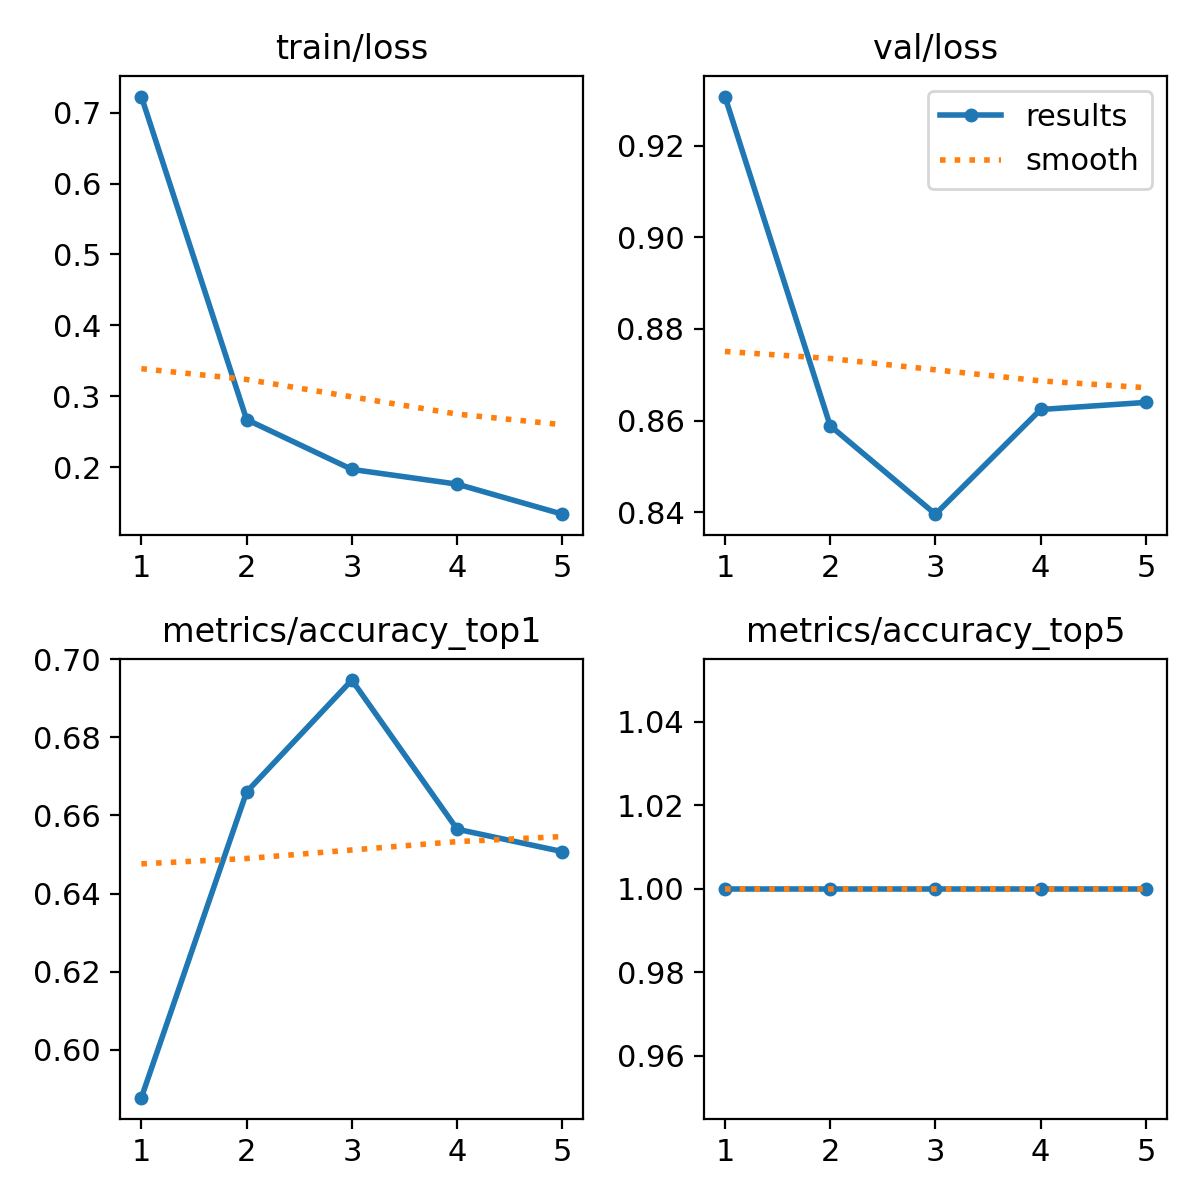

In [10]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/train8/results.png')

When we increased imgsz from 224 to 600, we got:

In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/drive/MyDrive/Colab Notebooks/final_waste_dataset', epochs=6, imgsz=600)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights
New https://pypi.org/project/ultralytics/8.2.1 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/drive/MyDrive/Colab Notebooks/final_waste_dataset, epochs=6, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, sav

train: Scanning /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train... 2109 images, 0 corrupt: 100%|██████████| 2109/2109 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train/organic_waste/organic_013974.jpeg: corrupt JPEG restored and saved



val: Scanning /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... 1048 images, 1 corrupt: 100%|██████████| 1048/1048 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000011.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000114.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000122.jpeg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'jpg', 'pfm', 'jpeg', 'tiff', 'dng', 'webp', 'bmp', 'mpo', 'png', 'tif'}
videos: {'gif', 'mp4', 'wmv', 'mpeg', 'mpg', 'webm', 'm4v', 'avi', 'mkv', 'mov', 'asf', 'ts'}
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 0 dataloader workers
Logging results to runs/classify/train9
Starting training for 6 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [03:07<00:00,  5.69s/it]

                   all      0.593          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [03:04<00:00,  5.58s/it]

                   all      0.697          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [02:51<00:00,  5.18s/it]

                   all      0.635          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [03:06<00:00,  5.66s/it]

                   all      0.671          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [02:55<00:00,  5.32s/it]

                   all       0.67          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [02:54<00:00,  5.28s/it]

                   all      0.662          1

6 epochs completed in 1.832 hours.


Optimizer stripped from runs/classify/train9/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train9/weights/best.pt, 3.0MB

Validating runs/classify/train9/weights/best.pt...
Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train... found 2109 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... found 1049 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [02:35<00:00,  4.70s/it]


                   all      0.696          1
Speed: 0.0ms preprocess, 112.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train9
Results saved to runs/classify/train9


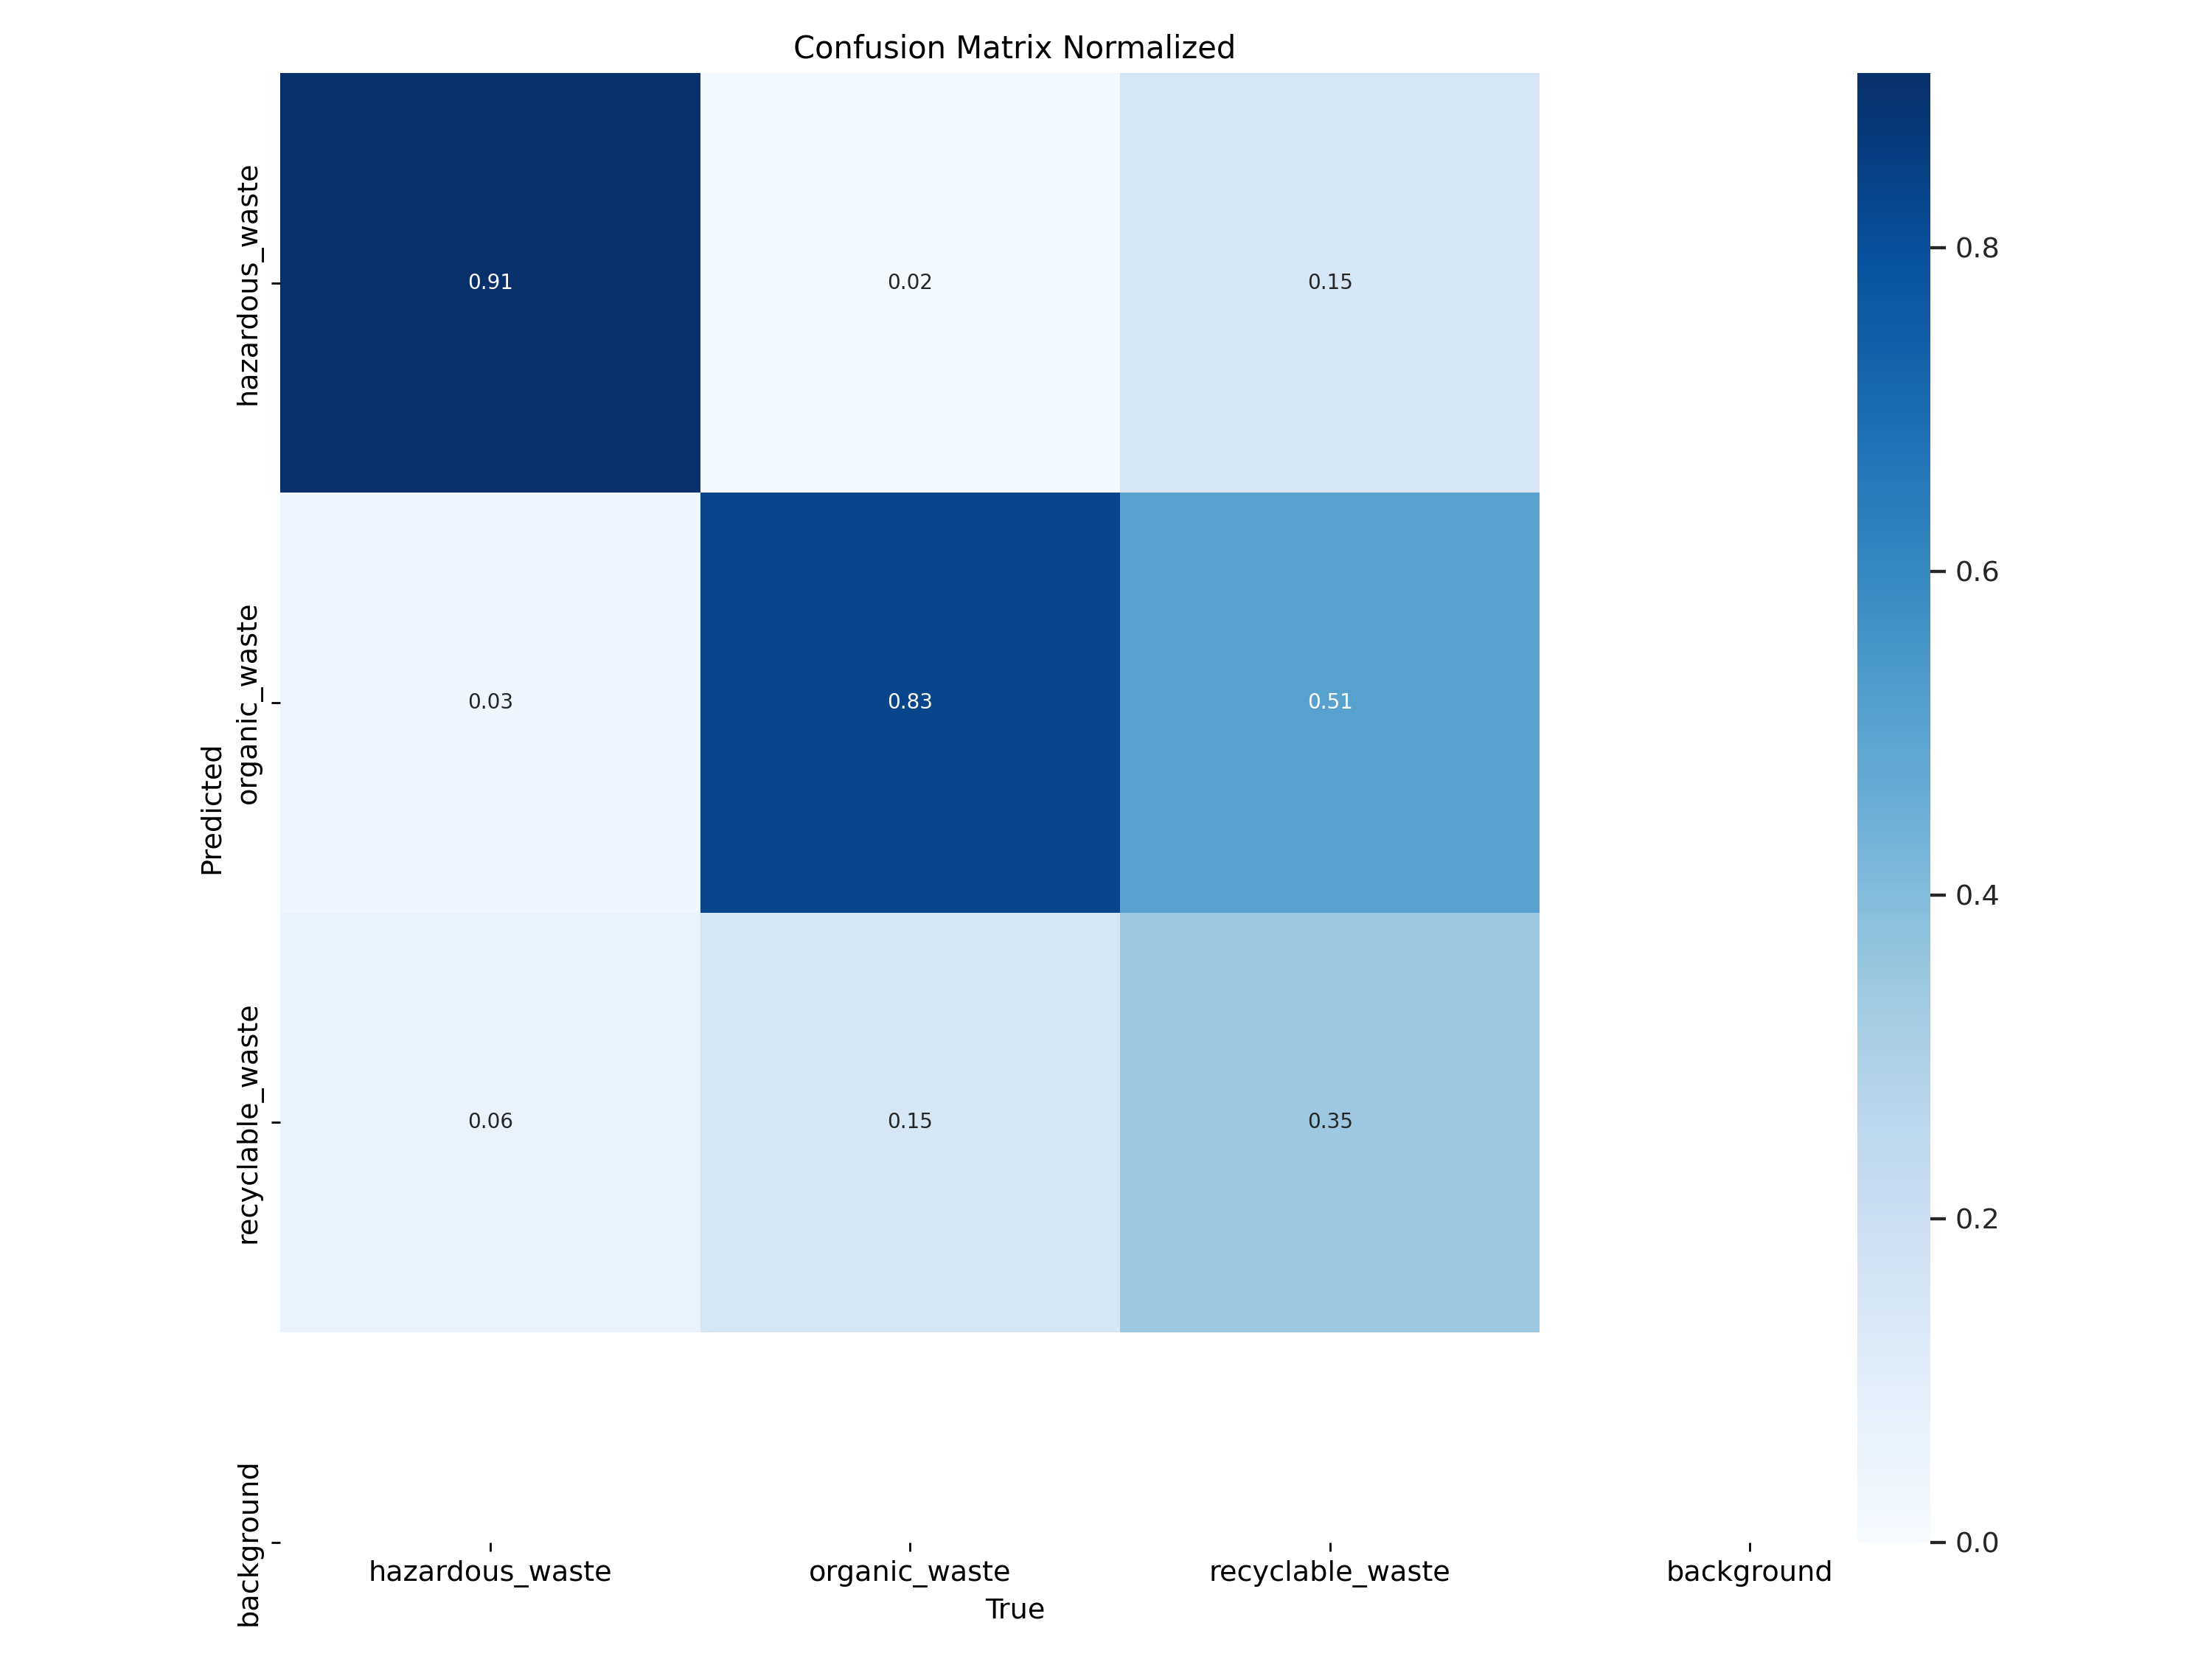

In [13]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/train9/confusion_matrix_normalized.png')

## 2. Evaluation

In [14]:
model= YOLO("/content/drive/MyDrive/Colab Notebooks/runs/classify/train8/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.2.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/train... found 2109 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... found 1049 images in 3 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val... 1048 images, 1 corrupt: 100%|██████████| 1048/1048 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000011.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000114.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/final_waste_dataset/val/hazardous_waste/hazardous_000122.jpeg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'jpg', 'pfm', 'jpeg', 'tiff', 'dng', 'webp', 'bmp', 'mpo', 'png', 'tif'}
videos: {'gif', 'mp4', 'wmv', 'mpeg', 'mpg', 'webm', 'm4v', 'avi', 'mkv', 'mov', 'asf', 'ts'}



               classes   top1_acc   top5_acc: 100%|██████████| 66/66 [00:36<00:00,  1.83it/s]


                   all      0.694          1
Speed: 0.0ms preprocess, 15.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


1.0

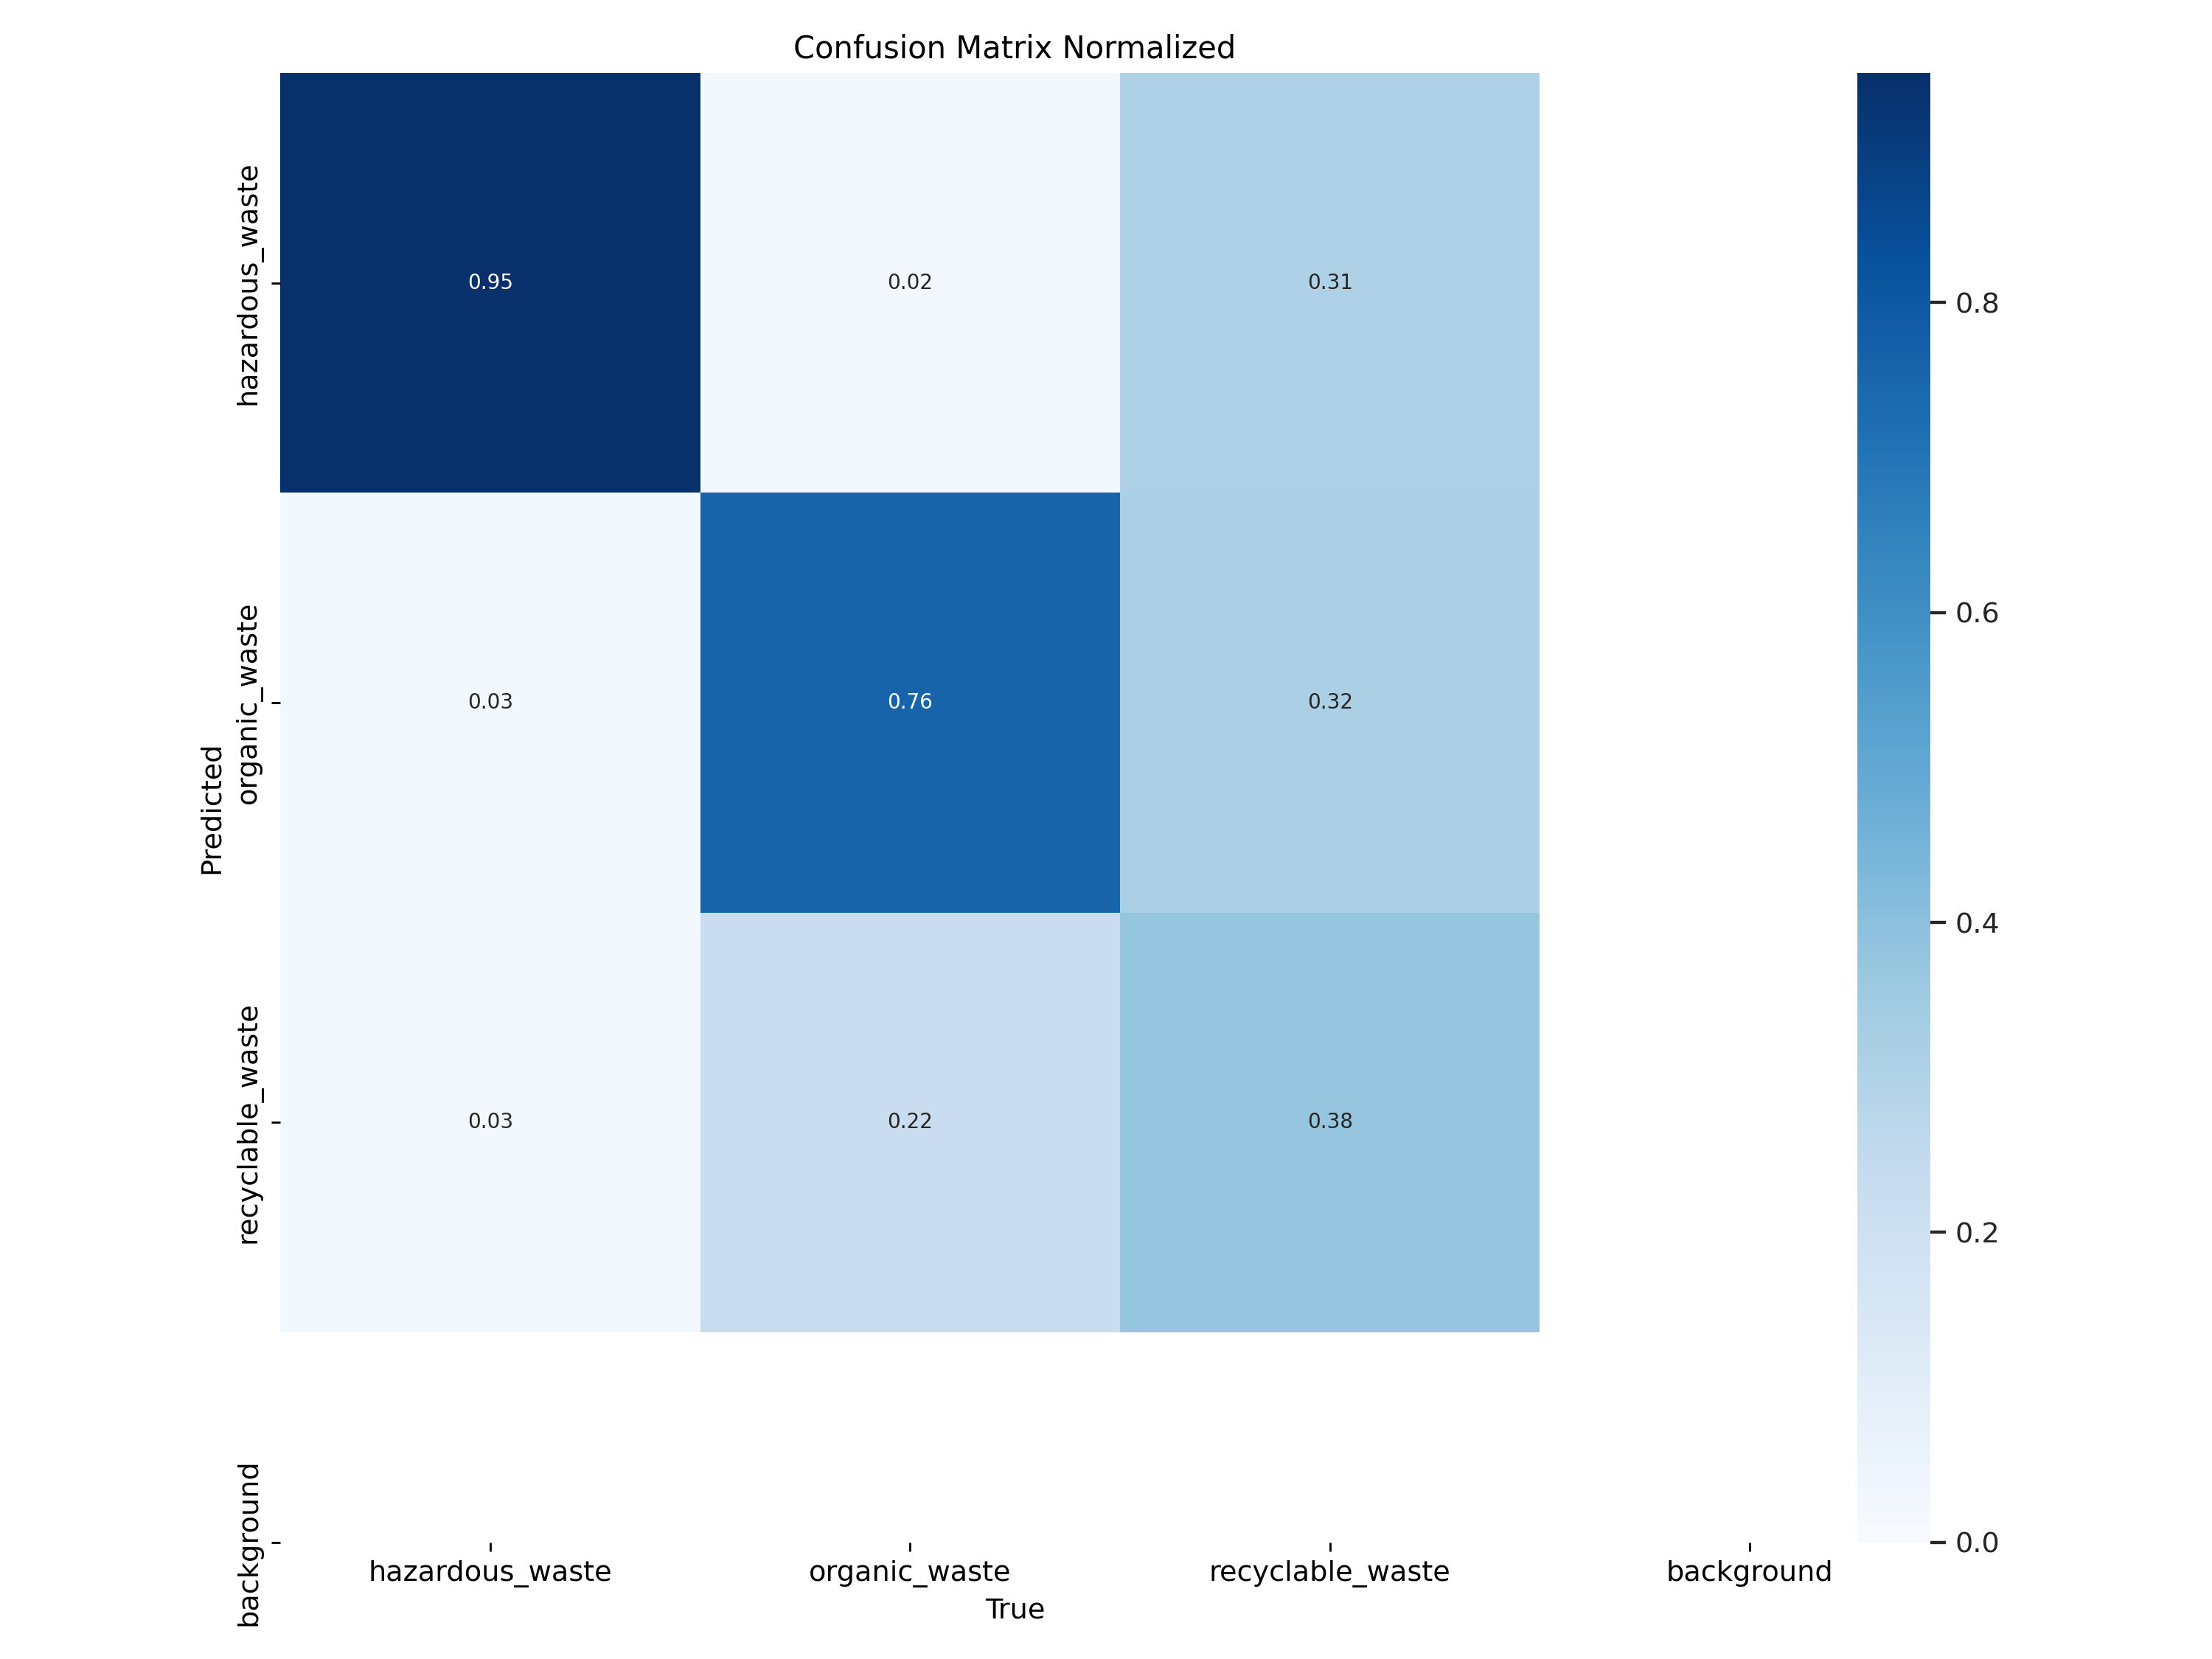

In [15]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/train8/confusion_matrix_normalized.png')

## 3. Prediction

In [16]:
results=model('https://www.epa.gov/sites/default/files/2014-06/household-hazardous-waste.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities



Found https://www.epa.gov/sites/default/files/2014-06/household-hazardous-waste.jpg locally at household-hazardous-waste.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/household-hazardous-waste.jpg: 224x224 recyclable_waste 0.93, hazardous_waste 0.06, organic_waste 0.02, 27.9ms
Speed: 42.8ms preprocess, 27.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0584, 0.0164, 0.9252])
orig_shape: None
shape: torch.Size([3])
top1: 2
top1conf: tensor(0.9252)
top5: [2, 0, 1]
top5conf: tensor([0.9252, 0.0584, 0.0164])


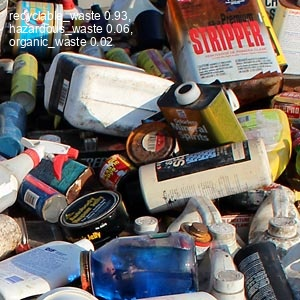

In [18]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict2/household-hazardous-waste.jpg')

In [19]:
results=model('https://www.treehugger.com/thmb/zcbeyVtOH23xFmbxXPSDJvxpEp8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities


Found https://www.treehugger.com/thmb/zcbeyVtOH23xFmbxXPSDJvxpEp8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg locally at GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg: 224x224 recyclable_waste 0.80, hazardous_waste 0.15, organic_waste 0.05, 36.8ms
Speed: 12.5ms preprocess, 36.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.1513, 0.0484, 0.8003])
orig_shape: None
shape: torch.Size([3])
top1: 2
top1conf: tensor(0.8003)
top5: [2, 0, 1]
top5conf: tensor([0.8003, 0.1513, 0.0484])


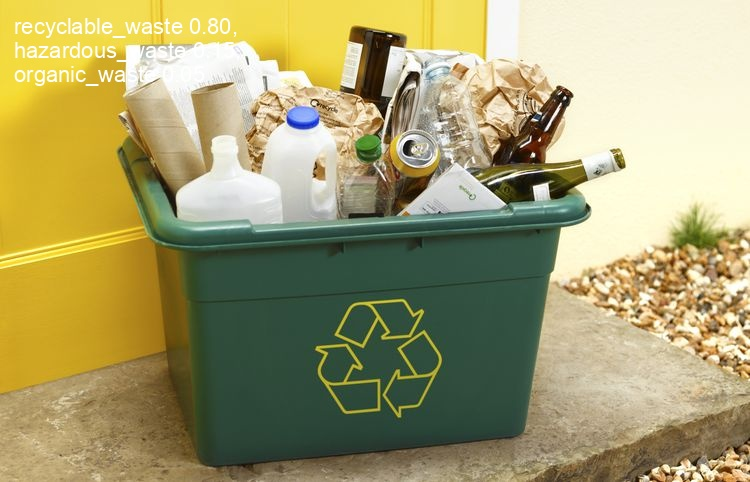

In [20]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict2/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg')

In [21]:
results=model('http://www.cec.org/fw/wp-content/uploads/2018/02/about-organic-waste.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities


Found http://www.cec.org/fw/wp-content/uploads/2018/02/about-organic-waste.jpg locally at about-organic-waste.jpg
image 1/1 /content/drive/MyDrive/Colab Notebooks/about-organic-waste.jpg: 224x224 organic_waste 0.99, hazardous_waste 0.01, recyclable_waste 0.00, 34.0ms
Speed: 22.6ms preprocess, 34.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
ultralytics.engine.results.Probs object with attributes:

data: tensor([6.1529e-03, 9.9310e-01, 7.4481e-04])
orig_shape: None
shape: torch.Size([3])
top1: 1
top1conf: tensor(0.9931)
top5: [1, 0, 2]
top5conf: tensor([9.9310e-01, 6.1529e-03, 7.4481e-04])


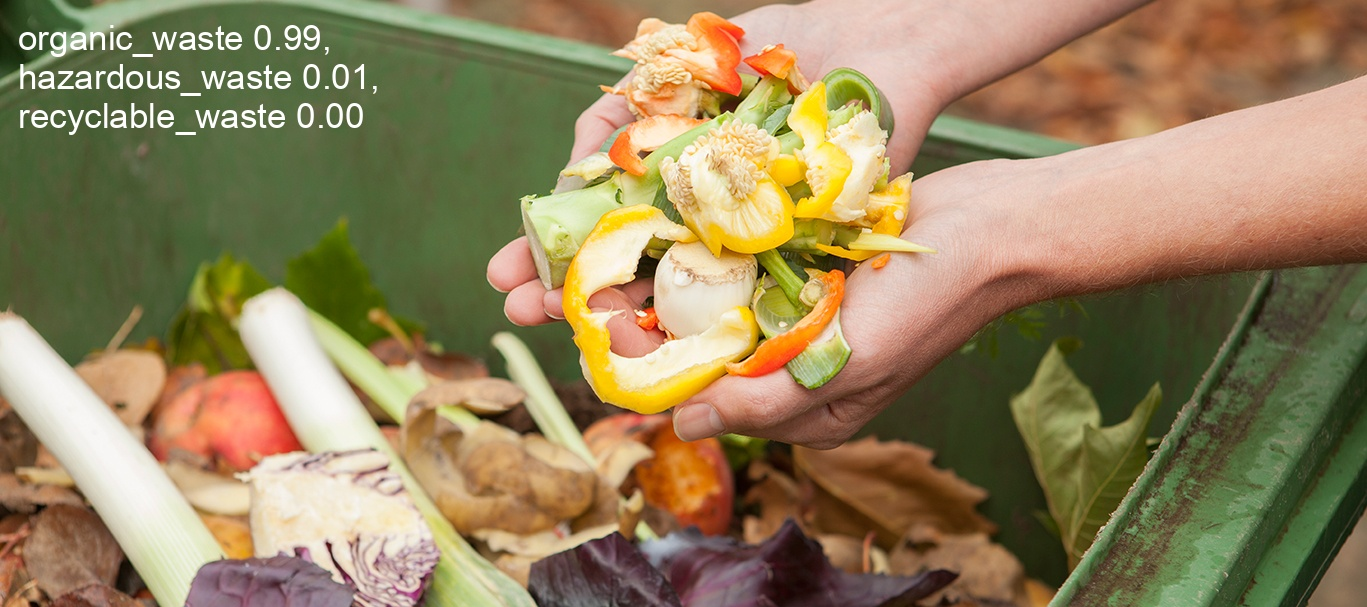

In [22]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict2/about-organic-waste.jpg')